## 4.3 앙상블 학습 개요

여러개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

## 앙상블의 유형

* 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)으로 구분할 수 잇으며 이외에 스태킹(Stacking)등의 기법이 있음
* **대표적인 배깅은 랜덤포레스트(Random Forest)알고리즘이 있으며, 부스팅은 에이다 부스팅, 그래디언트 부스팅, XGBoost, LightGBM등이 있다.**  
정형 데이터의 분류나 회귀에서는 GBM 부스팅 계열의 앙상블이 전반적으로 높은 예측 성능을 나타냄
* 넓은 의미로는 서로 다른 모델을 결합한 것들을 앙상블로 지칭하기도 함

<h2> 앙상블의 특징 </h2>

- 단일 모델의 약점을 다수의 모델들을 결합하여 보완
- 뛰어난 성능을 가진 모델들로만 구성하는 것보다 성능이 떨어지더라도  
서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능이 도움이 될 수 있음.(성능이 떨어지는 모델을 섞으라는게 아니라, 이질적인 걸 섞던가 그러라는 말임)
- 랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정 트리 알고리즘을 기반 알고리즘으로 적용함.
- 결정 트리의 단점인 과적합(오버 피팅)을 수십~수천개의 많은 분류기를 결합해 보완하고 장점인 직관적인 분류 기준은 강화됨.

<h1> 보팅(Voting)과 배깅(Bagging)의 개요 </h1>

![votingBagging](img/votingBagging.png)

# 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(soft Voting)
![보팅유형](img/hardVsoftV.png)

### Voting Classifier

**위스콘신 유방암 데이터 로드**

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교**

In [4]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression(max_iter = 10000)
knn_clf = KNeighborsClassifier(n_neighbors=8)#최근접이웃방식 KNN

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__#__name__을 하면 클래스 네임이 나온다.
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9649
KNeighborsClassifier 정확도: 0.9386


위 결과만 봤을 때는 Voting을 해서 낮아지긴했지만.. 좋아질 수 있는 가능성도 있다 정도로만 이해하고 넘어가자.

## 4.4 Random Forest

### 배깅(Bagging) = 랜덤 포레스트(Random Forest)  
랜덤 포레스트는 다재다능하다. 앙상블 기법에서 빠른 수행속도가 뛰어나고 분류 성능도 괜찮다.


![BagRandom](img/BagRandom.png)

## 랜덤 포레스트의 부트스트래핑 분할
* 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링 된 데이터 세트이다.   
이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라고 한다.  
(그래서 배깅(Bagging)이 bootstrap aggregating의 줄임말이다).

* 원본 데이터의 건수가 10개인 학습데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하려고 n_estimators=3으로 하이퍼 파라미터를 부여하면 다음고 같이 데이터 서브세트가 만들어진다.

![부트스트래핑](img/bootstrap.png)

### 사이킷런 랜덤 포레스트 하이퍼 파라미터

#### 사이킷런은 랜덤 포레스트 분류를 위해 RandomForestClassifier 클래스를 제공합니다.

**RandomForestClassifier 하이퍼 파라미터**

* n_estimaotrs: 랜덤 포레스트에서 결정 트리의 개수를 지정. 디폴트는 10개. 많이 설정할수록 좋은 성능 기대. but 계속 증가시킨다고 무조건 성능 향상 X.  
또한 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 함.



* max_features는 결정 트리에 사용된 max_features 파라미터와 같음. 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라  
'auto', 즉 'sqrt'(squreRoot= 제곱근)과 같다. (예:9라면 제곱근하여 3개) 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라  
sqrt(전체 피처 개수)만큼 참조한다.(전체 피처가 16개라면 분할을 위해 4개 참조)


* max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있다.

**결정 트리에서 사용한 사용자 행동 인지 데이터 세트 로딩**

### 수정 버전 01: 날짜 2019.10.27일

**원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.**  
**중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성**

In [5]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [6]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

**학습/테스트 데이터로 분리하고 랜덤 포레스트로 학습/예측/평가**

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


**GridSearchCV 로 교차검증 및 하이퍼 파라미터 튜닝**

In [8]:
from sklearn.model_selection import GridSearchCV

#max_depth 4개, min_samples_leaf 3개, min_samples_split 4개. 4x3x3= 36번. 
#여기에 cv도 곱해줘야 함.n_estimators는 일단 100으로 줄여서.(시간의 문제) 나중에 최적화 되면 늘리면 됨. 

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
 

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행. 36x2 = 72번 수행. 
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


**튜닝된 하이퍼 파라미터로 재 학습 및 예측/평가**

In [9]:
#이번엔 n_estimators를 300으로 늘렸음. 
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


**개별 feature들의 중요도 시각화**  
(대부분 feature 중요도 시각화는 이 코드를 그대로 쓴다고 보면 됨)

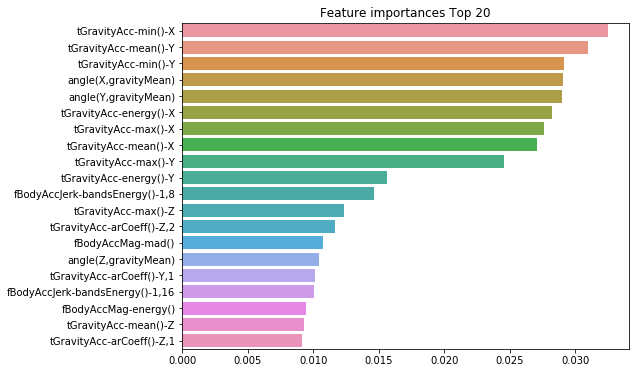

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 부스팅( Boosting)

* 부스팅 알고리즘은 여러개의 약한 학습기(weak learner)를 **순차적**으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식(순차적으로 하다보니까 수행시간이 오래걸린다)

* 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)에이다 부스트와 그래디언트 부스트가 있다.

## 에이다 부스팅의 학습/예측 프로세스 -1


1. 분류기준1: +와 - 가 있는 데이터 셋이 있다고 하고 분류 기준을 나눈다. 기준 상 -가 있어야될 곳에 있는 +는 오류다.  
2. 분류기준2: 다음 번에 분류할 때는 더 잘 분류할 수 있도록 가중치를 줘본다. 그래보니 -가 +가 있어야될 곳 에 있다.
3. 분류기준3: 또 해보니까 오류가 있다.
4. 분류 기준 1,2,3을 결합한 예측  


![AdaBoost](img/AdaBoost.png)

![AdaBoost1](img/AdaBoost1.png)



## GBM(Gradient Boost Machine) 개요  

그래디언트 부스트는 되게 중요한 기법이다! 경사하강법을 이용하여 반복 수행하여 가중치 업데이트를 한다  


![GBM](img/GBM.png)



## 사이킷런 GBM 주요 하이퍼 파라미터 및 튜닝

![GBMTune](img/GBMTune.png)

## 4.5 GBM(Gradient Boosting Machine)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


GBM 정확도: 0.9386
GBM 수행 시간: 568.2 초 


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
'split0_test_score', 'split1_test_score']]

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))